<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Data-Analytics-in-R/blob/main/Using_Tidyverse_in_Gapminder_dataset_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
install.packages("gapminder")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
# Load
library(gapminder)
library(dplyr)
library(ggplot2)

# Gapminder Dataset

In [3]:
head(gapminder)
str(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


tibble [1,704 × 6] (S3: tbl_df/tbl/data.frame)
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int [1:1704] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num [1:1704] 28.8 30.3 32 34 36.1 ...
 $ pop      : int [1:1704] 8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num [1:1704] 779 821 853 836 740 ...


# Using dplyr pipe operator (%>%) 

## Filtering Country Australia

In [4]:
# Show last 5 years census of Australia without dplyr
tail(gapminder[gapminder$country=='Australia',],5)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Australia,Oceania,1987,76.320,16257249,21888.89
Australia,Oceania,1992,77.560,17481977,23424.77
Australia,Oceania,1997,78.830,18565243,26997.94
Australia,Oceania,2002,80.370,19546792,30687.75
Australia,Oceania,2007,81.235,20434176,34435.37


## Filtering year 2007 only 


In [6]:
# year==2007 
head(gapminder[gapminder$year==2007,])

# dplyr:
gapminder %>%
  filter(year==2007) %>% 
  head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,2007,43.828,31889923,974.5803
Albania,Europe,2007,76.423,3600523,5937.0295
Algeria,Africa,2007,72.301,33333216,6223.3675
Angola,Africa,2007,42.731,12420476,4797.2313
Argentina,Americas,2007,75.320,40301927,12779.3796
Australia,Oceania,2007,81.235,20434176,34435.3674


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,2007,43.828,31889923,974.5803
Albania,Europe,2007,76.423,3600523,5937.0295
Algeria,Africa,2007,72.301,33333216,6223.3675
Angola,Africa,2007,42.731,12420476,4797.2313
Argentina,Americas,2007,75.320,40301927,12779.3796
Australia,Oceania,2007,81.235,20434176,34435.3674


## Double filtering with logical operators & and |

In [7]:
# year==2007 
head(gapminder[(gapminder$year==2007) & (gapminder$country=='Australia'),])

# dplyr
gapminder %>%
  filter(year==2007, gapminder$country=='Australia') %>% 
  head(2)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Australia,Oceania,2007,81.235,20434176,34435.37


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Australia,Oceania,2007,81.235,20434176,34435.37


## Filtering year 2007, best 10 countries in life expectancy.

In [8]:
gapminder %>%
  filter(year==2007) %>%
  arrange(desc(lifeExp)) %>%
  head(10)  

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Japan,Asia,2007,82.603,127467972,31656.07
"Hong Kong, China",Asia,2007,82.208,6980412,39724.98
Iceland,Europe,2007,81.757,301931,36180.79
Switzerland,Europe,2007,81.701,7554661,37506.42
Australia,Oceania,2007,81.235,20434176,34435.37
Spain,Europe,2007,80.941,40448191,28821.06
Sweden,Europe,2007,80.884,9031088,33859.75
Israel,Asia,2007,80.745,6426679,25523.28
France,Europe,2007,80.657,61083916,30470.02


## Create a new variable total gdpofcountrym filter and sort

In [ ]:
gapminder %>%
  mutate(dgp_country_millions = pop * gdpPercap / 1000000) %>%
  filter(year==2007) %>%
  arrange(desc(dgp_country_millions)) %>%
  head(10)

country,continent,year,lifeExp,pop,gdpPercap,dgp_country_millions
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>
United States,Americas,2007,78.242,301139947,42951.653,12934459
China,Asia,2007,72.961,1318683096,4959.115,6539501
Japan,Asia,2007,82.603,127467972,31656.068,4035135
India,Asia,2007,64.698,1110396331,2452.210,2722925
Germany,Europe,2007,79.406,82400996,32170.374,2650871
United Kingdom,Europe,2007,79.425,60776238,33203.261,2017969
France,Europe,2007,80.657,61083916,30470.017,1861228
Brazil,Americas,2007,72.390,190010647,9065.801,1722599
Italy,Europe,2007,80.546,58147733,28569.720,1661264


# Visualizing with ggplot2

## GDP per capita and lifeexp relationship

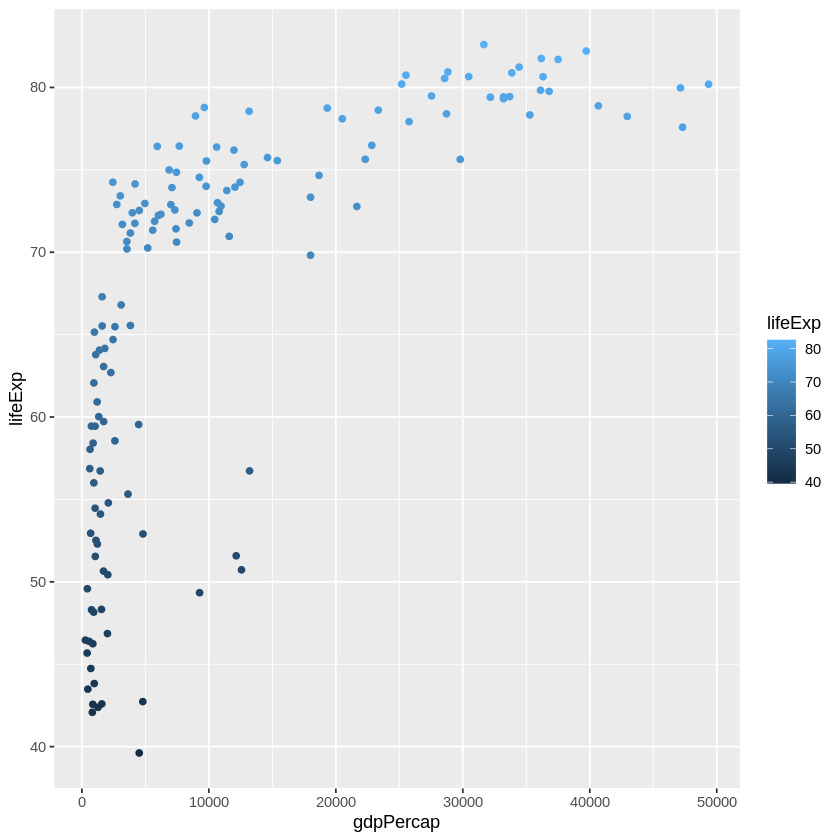

In [30]:
# I create a new dataset with only year 2007.
gap_2007 = gapminder %>%
  filter(year==2007)

# create scatter plot
ggplot(gap_2007, aes(x= gdpPercap, y= lifeExp, color=lifeExp)) + 
  geom_point()

### Log scale x axis

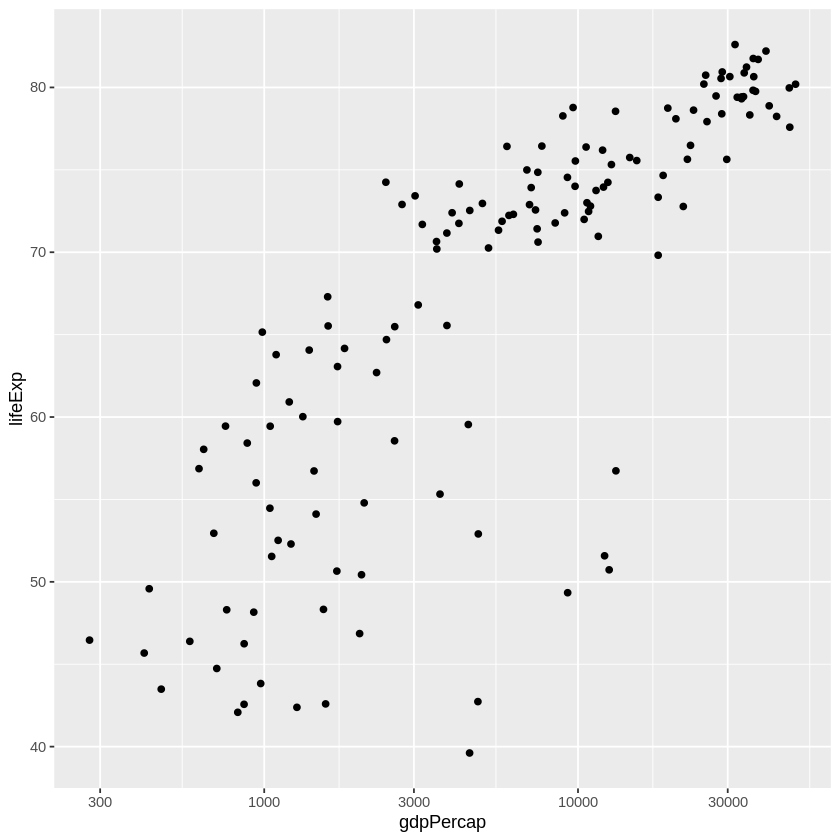

In [26]:
# create scatter plot
ggplot(gap_2007, aes(x= gdpPercap, y= lifeExp)) + 
  geom_point() + 
  scale_x_log10()

### Gdp and lifexp colored continent

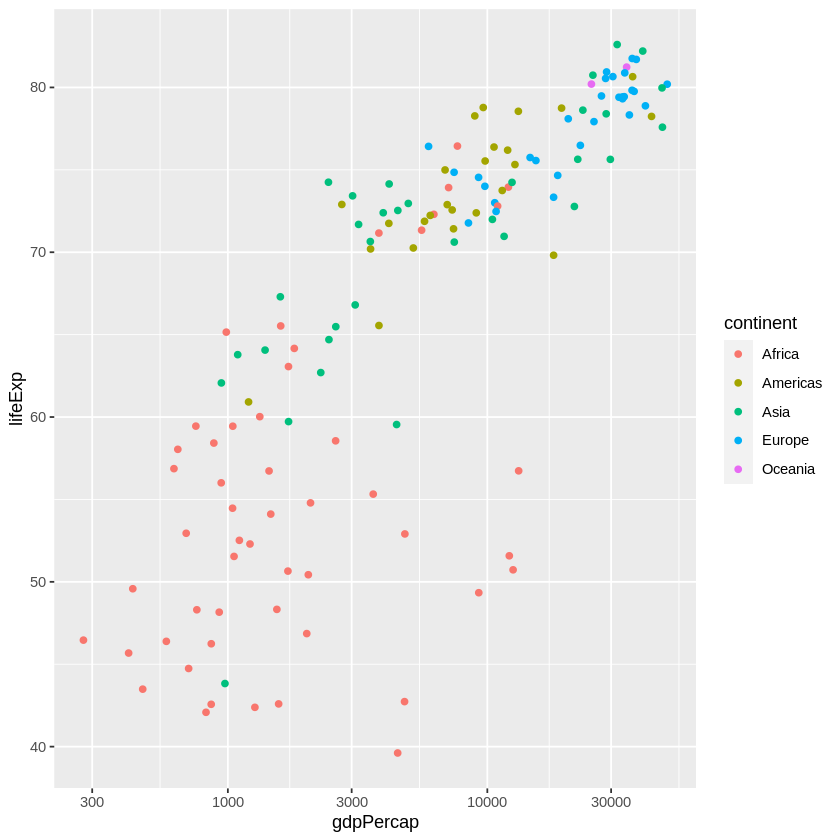

In [28]:
# create scatter plot
ggplot(gap_2007, aes(x= gdpPercap, y= lifeExp, color= continent)) + 
  geom_point() + 
  scale_x_log10()

### add size of point by population

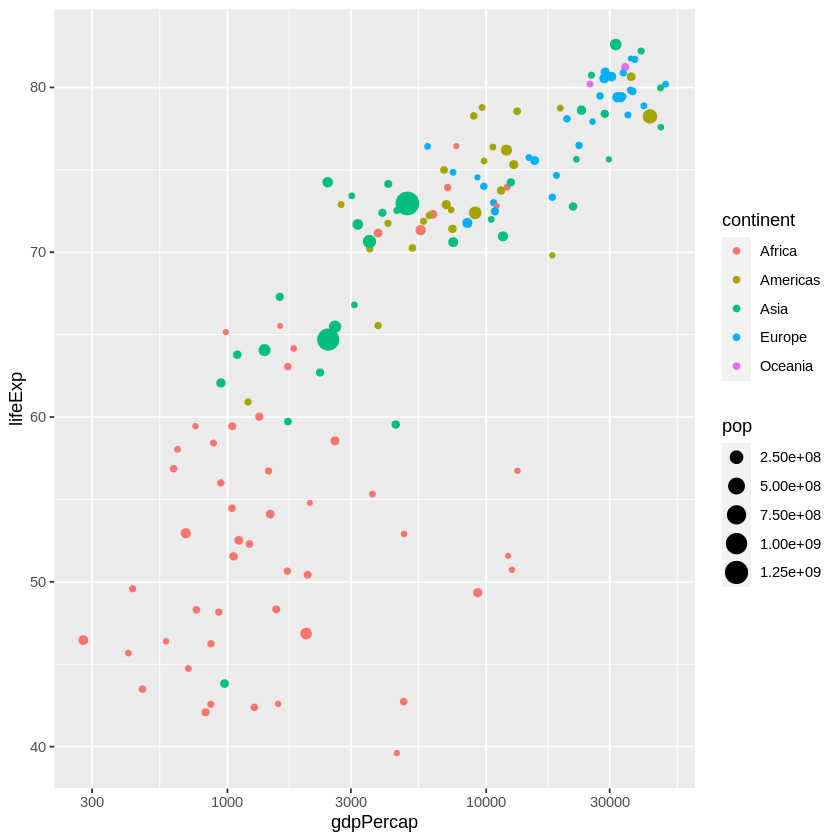

In [31]:
# create scatter plot
ggplot(gap_2007, aes(x= gdpPercap, y= lifeExp, color= continent, size= pop)) + 
  geom_point() + 
  scale_x_log10()

## Faceting the plot GDPpercap and lifeexp by continent

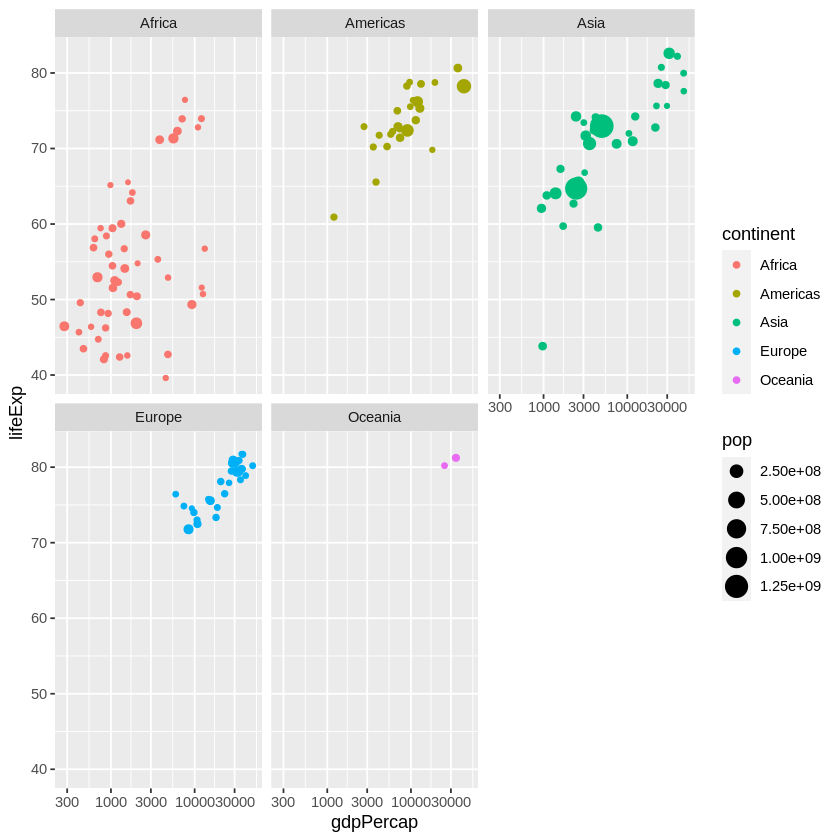

In [36]:
# create scatter plot
ggplot(gap_2007, aes(x= gdpPercap, y= lifeExp, color= continent, size= pop)) + 
  geom_point() + 
  scale_x_log10() + 
  facet_wrap(~ continent) # "~" means "by"

## Change throughout the years.

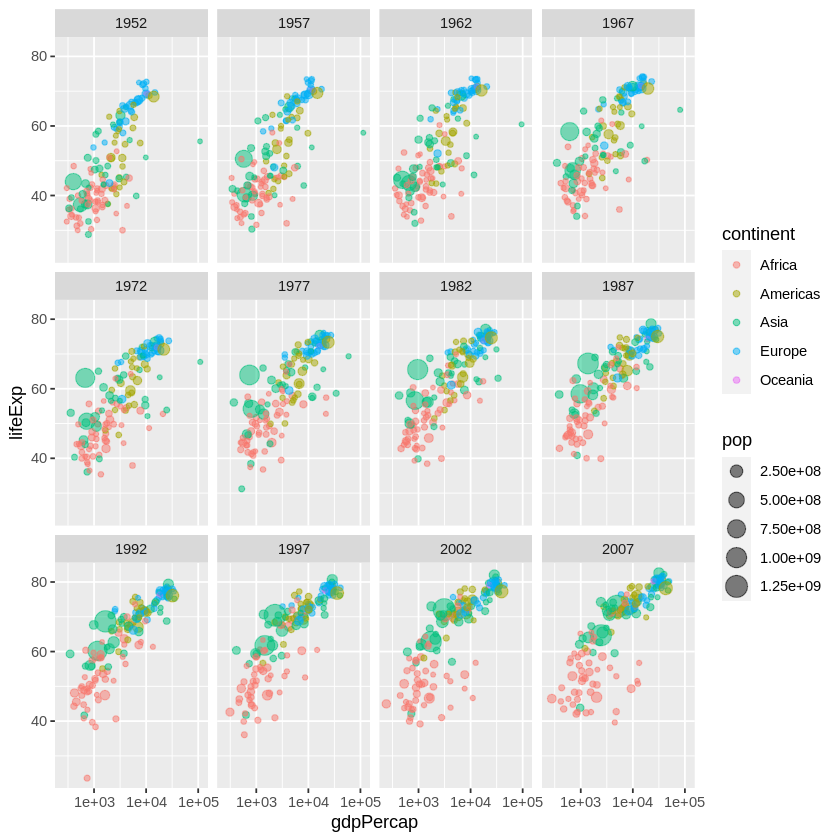

In [40]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
  geom_point(alpha=0.5) +
  scale_x_log10() +
  facet_wrap(~ year)

# Summarizing by year.

In [51]:
# Evolution 
year <- gapminder %>%
  group_by(year) %>%
  summarize(medianLifeExp = median(lifeExp), meanLifeExp = mean(lifeExp),
            maxGdpPercap = max(gdpPercap))

## Scatter evolution medianlifeexp by year

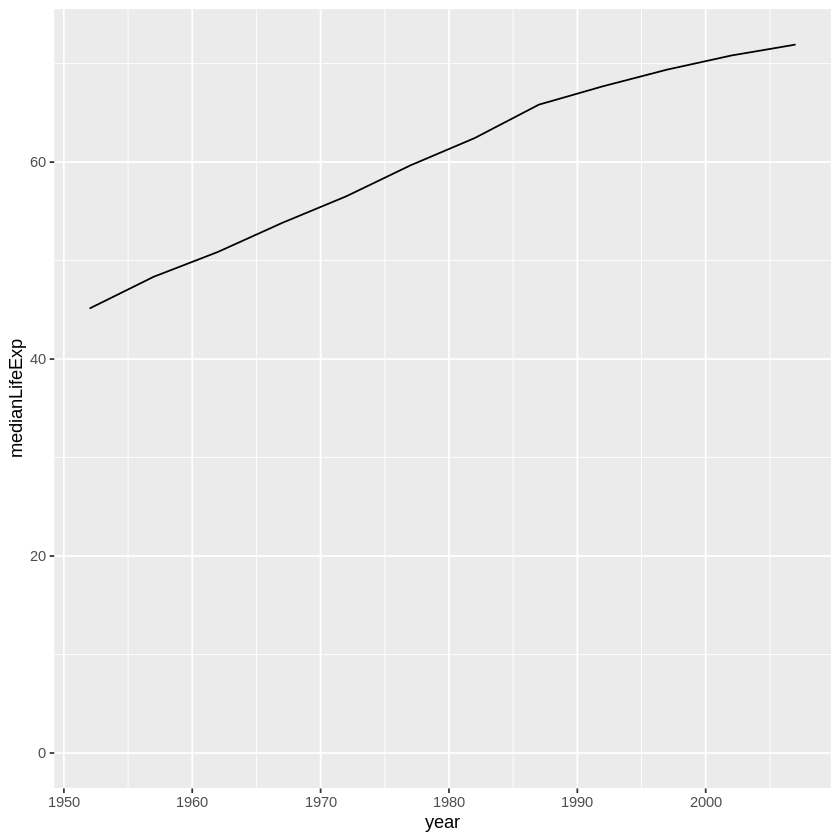

In [63]:
# Create a scatter plot showing the change in medianLifeExp over time
ggplot(year, aes(x = year, y = medianLifeExp)) +
  geom_line() +
  expand_limits(y = 0) # make y axis to start from 0

## scatter evolution lifeexp by continent.

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.



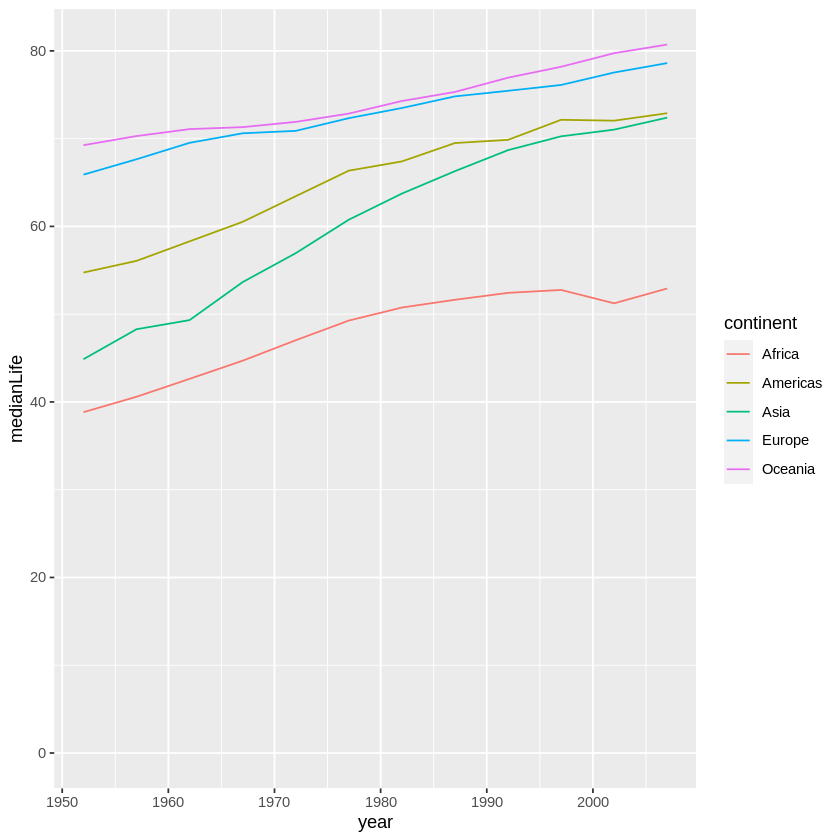

In [62]:
# Summarize by continent and year.
by_year_continent <- gapminder %>%
  group_by(continent, year) %>%
  summarize(medianLife = median(lifeExp))

# Plot
ggplot(by_year_continent, aes(x = year, y = medianLife, color = continent)) +
  geom_line() +
  expand_limits(y = 0)

# Summarize by continent

In [65]:
by_continent_2007 <- gapminder %>%
  filter(year==2007) %>%
  group_by(continent) %>%
  summarize(medianLifeExp = median(lifeExp), meanLifeExp = mean(lifeExp),
            medianGdpPercap = median(gdpPercap))

by_continent_2007

continent,medianLifeExp,meanLifeExp,medianGdpPercap
<fct>,<dbl>,<dbl>,<dbl>
Africa,52.9265,54.80604,1452.267
Americas,72.8990,73.60812,8948.103
Asia,72.3960,70.72848,4471.062
Europe,78.6085,77.64860,28054.066
Oceania,80.7195,80.71950,29810.188


## Boxplot lifExp each continent

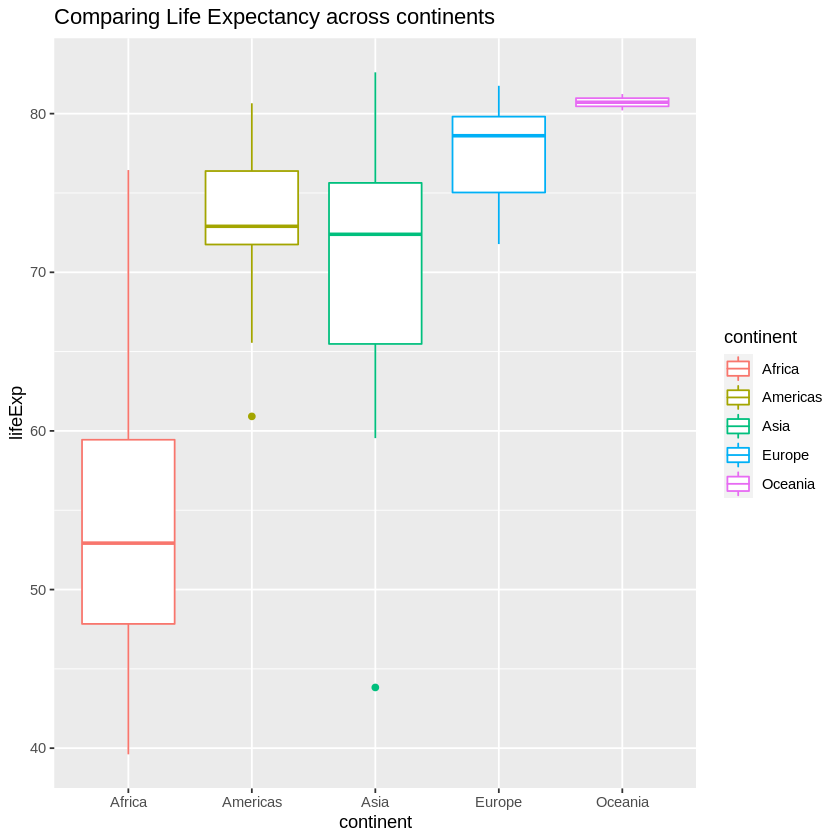

In [110]:
ggplot(gap_2007, aes(x = continent, y = lifeExp, color=continent)) +
  geom_boxplot() +
  ggtitle("Comparing Life Expectancy across continents")

# Evolution by year by Country in Oceania 

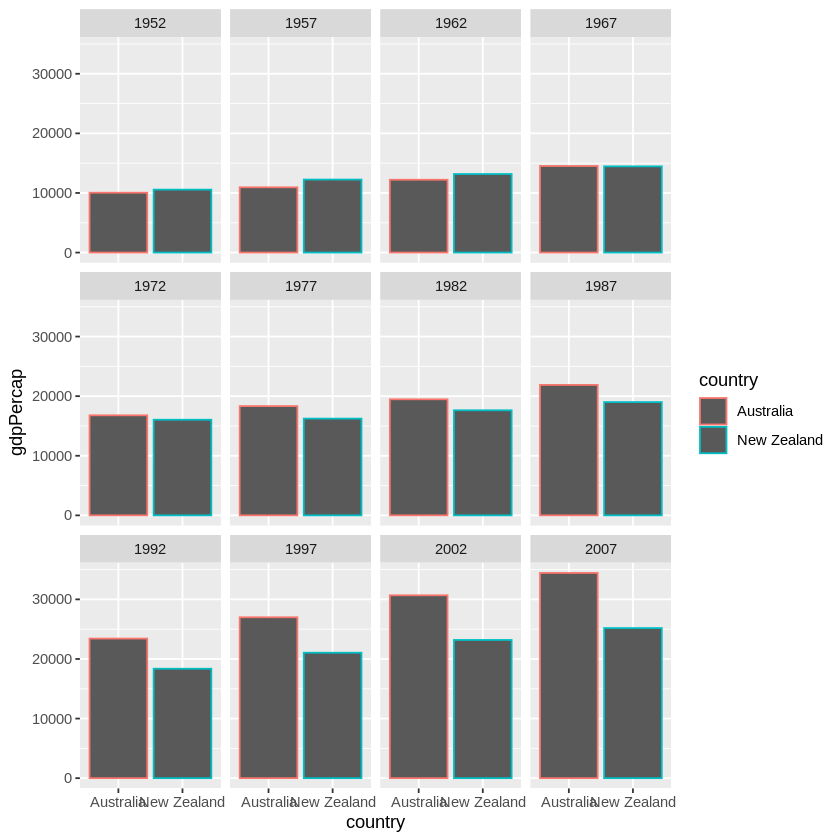

In [72]:
oceania <- gapminder %>%
  filter(continent == "Oceania")

# Create a bar plot of gdpPercap by country
ggplot(oceania, aes(x = country, y = gdpPercap, color= country)) +
  geom_col() + 
  facet_wrap(~ year)

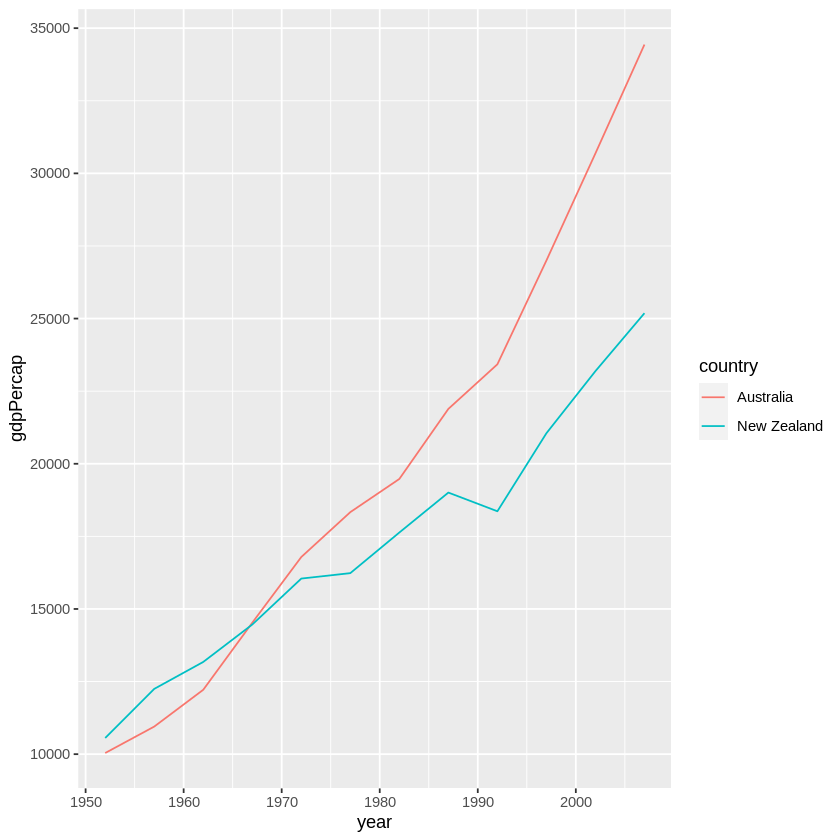

In [78]:
# Maybe better to plot as line
ggplot(oceania, aes(color = country, y = gdpPercap, x=year)) +
  geom_line() 

# GDP evolution

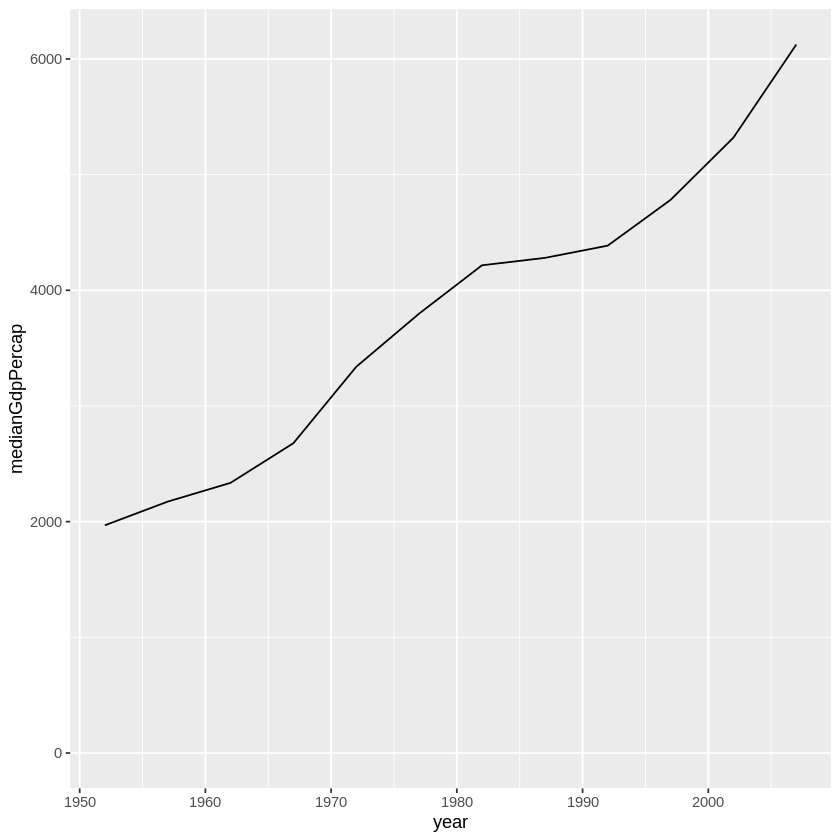

In [66]:
# Summarize the median gdpPercap by year
by_year <- gapminder %>%
  group_by(year) %>%
  summarize(medianGdpPercap = median(gdpPercap))

# line plot 
ggplot(by_year, aes(x = year, y = medianGdpPercap)) +
  geom_line() +
  expand_limits(y = 0)

# Histogram lifexp

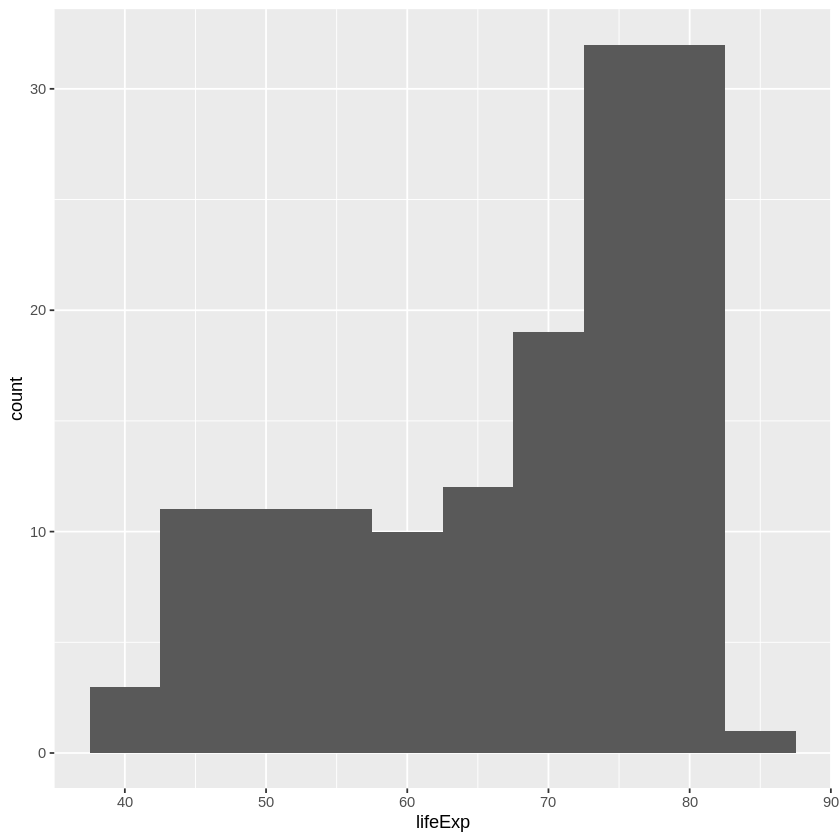

In [87]:
ggplot(gap_2007, aes(x= lifeExp)) + 
  geom_histogram(binwidth=5) # bins every 5 years.

# Hist GDP

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



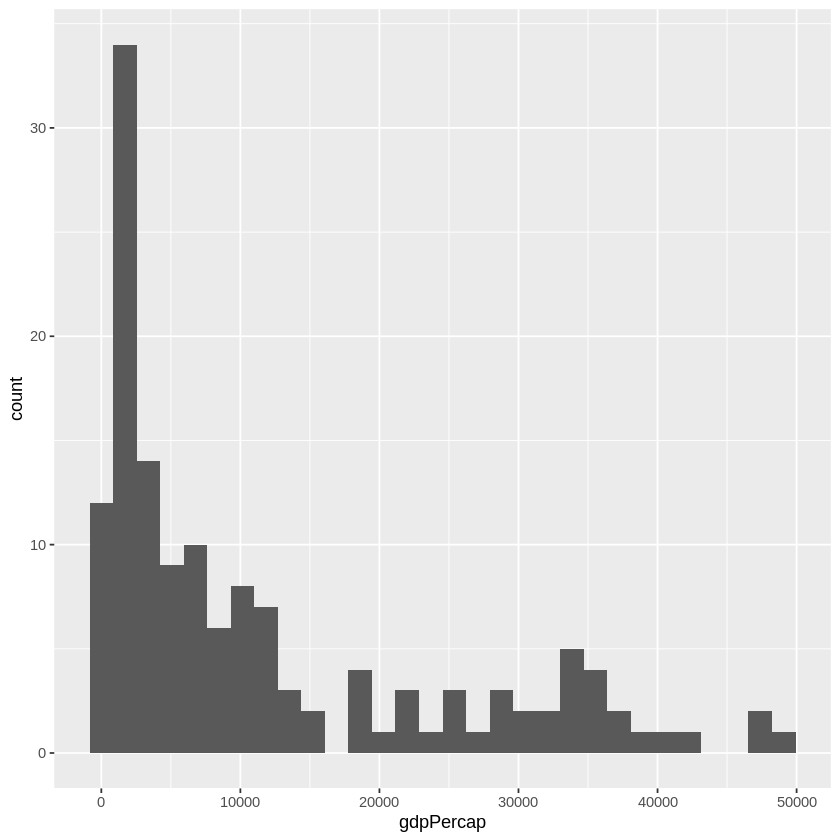

In [99]:
ggplot(gap_2007, aes(x= gdpPercap)) + 
  geom_histogram()

## Try log10 on x axis

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



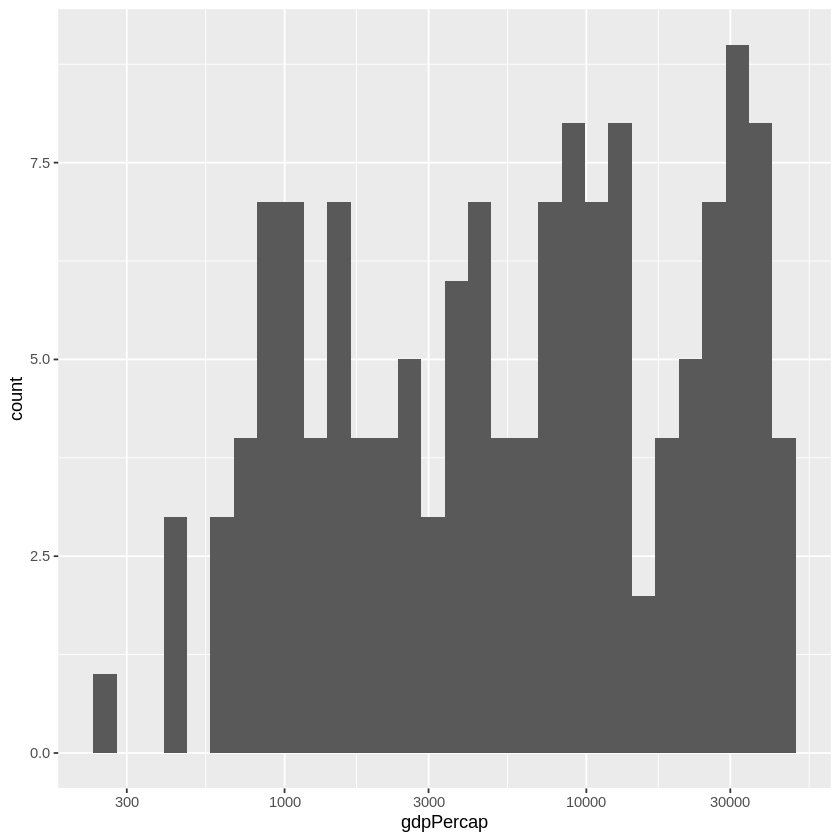

In [100]:
ggplot(gap_2007, aes(x= gdpPercap)) + 
  geom_histogram() +
  scale_x_log10()